We now evaluate the models. We start by comparing the counts of false positives to false negatives for each model, but now they are evaluated on the same continuous day sample of daily living.

In [5]:
import sys
import os
import torch

sys.path.append(os.path.abspath('..')) #so we can import for the dir above

from RegNet import RegNet
from eval_in_time_domain import get_false_postive_count

In [6]:
RECODING_TO_EVAL_ON = '/home/kuba/Documents/data/raw/kuba_watch_data/2024-07-10_06_42_46'


WINDOW_SIZE = 400
STRIDE = 50
THRESHOLD = 0.8

The recording partitioned into windows has shape of: torch.Size([51912, 6, 400])


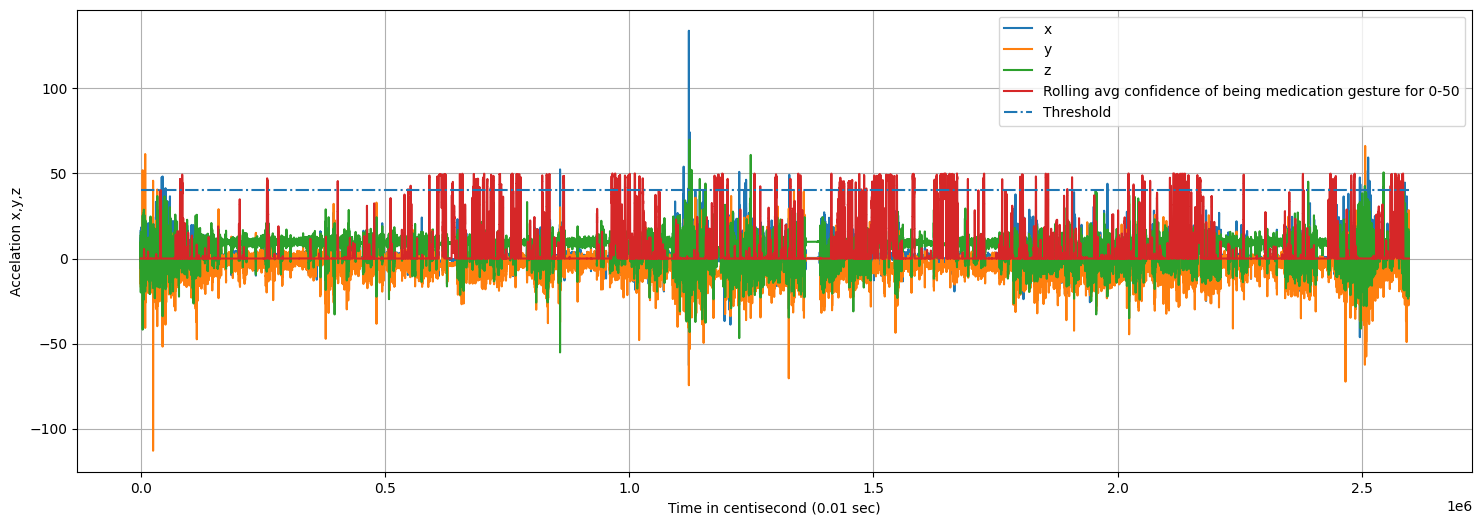

There is 321 of 6489 predictions over the confidance threshold(0.8)
At a rate of 4.9%


In [7]:
#load model00
model00_path = '/home/kuba/projects/medication-taking-data/new_start/week02/00_no_movment/94f1_with_filter_noMovmets.pth'
model = RegNet()
model.load_state_dict(torch.load(model00_path))
#get false postive count
count, total_num_windows = get_false_postive_count(model, RECODING_TO_EVAL_ON, WINDOW_SIZE, STRIDE, THRESHOLD, device='cuda:0')
print(f"At a rate of {(count/total_num_windows)*100:.1f}%")

The recording partitioned into windows has shape of: torch.Size([51912, 6, 400])


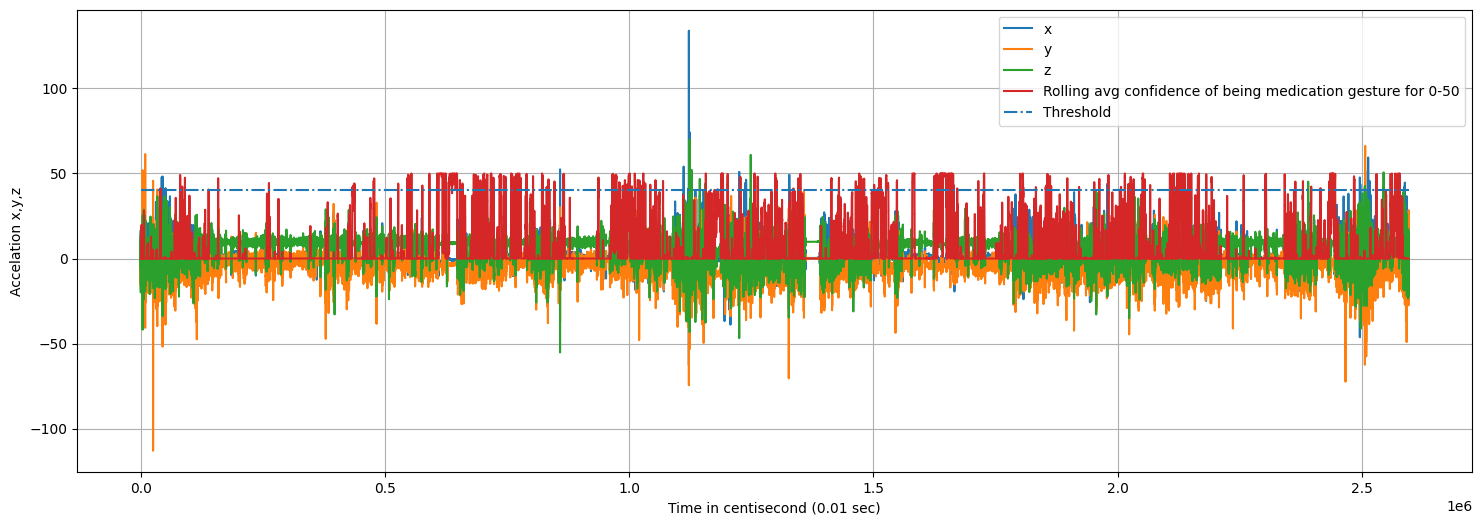

There is 374 of 6489 predictions over the confidance threshold(0.8)
At a rate of 5.8%


In [8]:
#load model01
model01_path = '/home/kuba/projects/medication-taking-data/new_start/week02/00_no_movment/94f1_without_filter_noMovments.pth'
model = RegNet()
model.load_state_dict(torch.load(model01_path))
#get false postive count
count, total_num_windows = get_false_postive_count(model, RECODING_TO_EVAL_ON, WINDOW_SIZE, STRIDE, THRESHOLD, device='cuda:0')
print(f"At a rate of {(count/total_num_windows)*100:.1f}%")

Now lets do the same but look at false negatives